In [1]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [10]:
errors_approximation=pd.read_csv('../data/'+ 'all_errors' + '.csv',index_col=0)
errors_approximation_old=pd.read_csv('../data/'+ 'all_errors_approximation_old' + '.csv',index_col=0)

columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test", "n", "r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)

errors_approximation_old=errors_approximation_old[columns]
display(errors_approximation_old)

,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.019052,0.056589,0.001039,0.045034,0,0
1,0.0,leaky_ReLU,0.043878,0.270347,0.010081,0.218711,1,0
2,0.0,leaky_ReLU,0.009675,0.183943,0.006735,0.206563,2,0
3,0.0,leaky_ReLU,0.047197,0.320803,0.002061,0.080441,3,0
4,0.0,leaky_ReLU,0.014963,0.067198,0.002954,1.636346,4,0
...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.108053,0.141900,0.040428,0.134413,5,2
656,0.2,tanh,0.116901,0.130110,0.118438,0.277328,6,2
657,0.2,tanh,0.122117,0.114988,0.116271,0.031750,7,2
658,0.2,tanh,0.115085,0.288816,0.077461,0.427289,8,2


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,tanh,0.048355,0.034498,0.001325,0.011692,0,0
1,0.0,tanh,0.015287,0.112211,0.003340,0.497563,1,0
2,0.0,tanh,0.119820,0.574555,0.001299,0.072254,2,0
3,0.0,tanh,0.043636,0.169878,0.000399,0.048745,3,0
4,0.0,tanh,0.019958,0.070403,0.000248,0.004091,4,0
...,...,...,...,...,...,...,...,...
655,0.2,leaky_ReLU,0.111458,0.211543,0.024829,0.152622,5,2
656,0.2,leaky_ReLU,0.142708,0.068140,0.142359,0.242984,6,2
657,0.2,leaky_ReLU,0.124684,0.268635,0.029091,0.038541,7,2
658,0.2,leaky_ReLU,0.168219,0.219296,0.114703,0.160794,8,2


In [11]:

#Split new and old errors by function
#--------------------------------------------------------------------------------------
errors_tanh=errors_approximation[errors_approximation["function"]=="tanh"]
errors_leaky=errors_approximation[errors_approximation["function"]=="leaky_ReLU"]

errors_tanh_old=errors_approximation_old[errors_approximation_old["function"]=="tanh"]
errors_leaky_old=errors_approximation_old[errors_approximation_old["function"]=="leaky_ReLU"]
#--------------------------------------------------------------------------------------

#Get means over r for tanh
#--------------------------------------------------------------------------------------
means_tanh=errors_tanh.groupby(['n', 'sigma'],as_index=False)\
[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].mean()

means_tanh_old=errors_tanh_old.groupby(['n', 'sigma'],as_index=False)\
[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].mean()
#--------------------------------------------------------------------------------------

#Get means over r for leaky
#--------------------------------------------------------------------------------------
means_leaky=errors_leaky.groupby(['n', 'sigma'],as_index=False)\
[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].mean()

means_leaky_old=errors_leaky_old.groupby(['n', 'sigma'],as_index=False)\
[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].mean()
#--------------------------------------------------------------------------------------

#Get stds for tanh
#--------------------------------------------------------------------------------------
std_tanh=errors_tanh.groupby(["n", "sigma"],as_index=False)[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].std() 
std_tanh_old=errors_tanh_old.groupby(["n", "sigma"],as_index=False)[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].std()
#--------------------------------------------------------------------------------------

#Get stds for leaky
#--------------------------------------------------------------------------------------
std_leaky=errors_leaky.groupby(["n", "sigma"],as_index=False)[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].std() 
std_leaky_old=errors_leaky_old.groupby(["n", "sigma"],as_index=False)[["rmse_nn_train", "rmse_mdl_train", "rmse_nn_test", "rmse_mdl_test"]].std()
#--------------------------------------------------------------------------------------

display(means_tanh)

std_tanh['Dataset'] = 'new'
std_tanh_old['Dataset'] = 'old'
combined_df = pd.concat([std_tanh, std_tanh_old], ignore_index=True)


,n,sigma,rmse_nn_train,rmse_mdl_train,rmse_nn_test,rmse_mdl_test
0,0,0.00,0.047406,0.000926,0.045479,0.013744
1,0,0.02,0.046920,0.011730,0.041015,0.033347
2,0,0.04,0.036645,0.045879,0.046726,0.025242
3,0,0.06,0.052343,0.051681,0.069784,0.071847
4,0,0.08,0.043358,0.045674,0.074857,0.011390
...,...,...,...,...,...,...
105,9,0.12,0.062056,0.054542,0.247413,0.356847
106,9,0.14,0.089771,0.077778,0.173224,0.844651
107,9,0.16,0.370732,0.253037,1.193336,0.160904
108,9,0.18,0.116103,0.085186,0.102257,1.000140


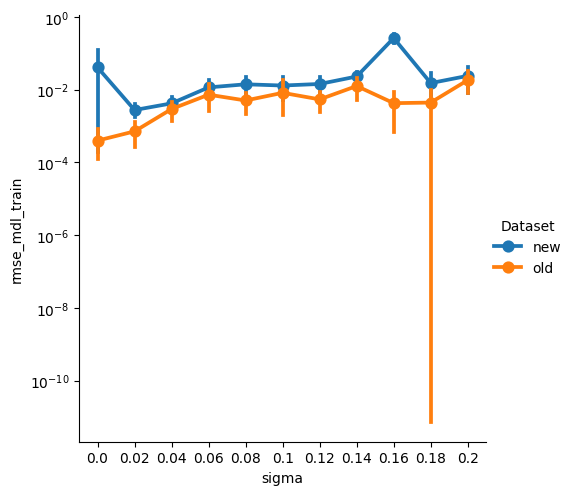

In [12]:
sns.catplot(
    data=combined_df,
    x='sigma',       # Replace with your column name
    y='rmse_mdl_train',       # Replace with your column name
    hue='Dataset',      # Color by dataset
    kind='point',         # Choose plot type: 'bar', 'box', 'violin', etc
)
plt.yscale("log")

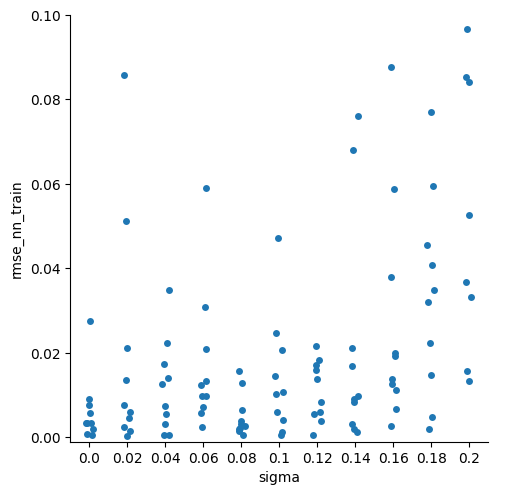

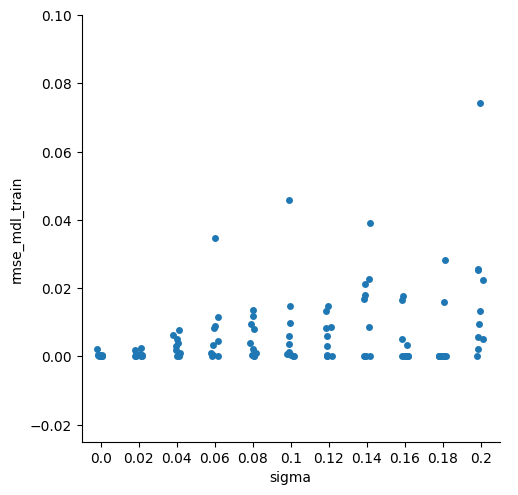

In [16]:
#name_fig='tanh_rmse_train.svg'
#plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=std_tanh_old, x="sigma", y="rmse_nn_train")
#plt.yscale("log")
plt.ylim(-0.001,0.10)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
plt.show()

#sns.catplot(data=means_tanh_old, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'], legend_out=False)
sns.catplot(data=std_tanh_old, x="sigma", y="rmse_mdl_train")
#plt.yscale("log")
plt.ylim(-0.025,0.10)
#plt.savefig(output_path+'dist_train_tanh_old',dpi=300)
plt.show()

In [138]:
#Split by function
errors_tanh=errors_approximation[errors_approximation['function']=='tanh']
errors_leaky=errors_approximation[errors_approximation['function']=='leaky_ReLU']

display(errors_tanh)
display(errors_leaky)

errors_tanh_old=errors_approximation_old[errors_approximation_old['function']=='tanh']
errors_leaky_old=errors_approximation_old[errors_approximation_old['function']=='leaky_ReLU']

#--------------------------------------------------------
means_tanh=means_over_r[means_over_r['function']=='tanh']
display(means_tanh)
means_leaky=means_over_r[means_over_r['function']=='leaky']

stds_tanh=stds_over_r[stds_over_r['function']=='tanh']
stds_leaky=stds_over_r[stds_over_r['function']=='leaky']

means_tanh_old=means_over_r_old[means_over_r_old['function']=='tanh']
means_leaky_old=means_over_r_old[means_over_r_old['function']=='leaky']

stds_tanh_old=stds_over_r_old[stds_over_r_old['function']=='tanh']
stds_leaky_old=stds_over_r_old[stds_over_r_old['function']=='leaky']

,sigma,n,r,function,error_train,value_train,error_test,value_test
330,0.0,0,0,tanh,rmse_nn_train,0.048355,rmse_nn_test,0.034498
331,0.0,1,0,tanh,rmse_nn_train,0.015287,rmse_nn_test,0.112211
332,0.0,2,0,tanh,rmse_nn_train,0.119820,rmse_nn_test,0.574555
333,0.0,3,0,tanh,rmse_nn_train,0.043636,rmse_nn_test,0.169878
334,0.0,4,0,tanh,rmse_nn_train,0.019958,rmse_nn_test,0.070403
...,...,...,...,...,...,...,...,...
2635,0.2,5,2,tanh,rmse_mdl_train,0.040428,rmse_mdl_test,0.134413
2636,0.2,6,2,tanh,rmse_mdl_train,0.118438,rmse_mdl_test,0.277328
2637,0.2,7,2,tanh,rmse_mdl_train,0.116271,rmse_mdl_test,0.031750
2638,0.2,8,2,tanh,rmse_mdl_train,0.077461,rmse_mdl_test,0.427289


,sigma,n,r,function,error_train,value_train,error_test,value_test
0,0.0,0,0,leaky_ReLU,rmse_nn_train,0.019052,rmse_nn_test,0.056589
1,0.0,1,0,leaky_ReLU,rmse_nn_train,0.043878,rmse_nn_test,0.270347
2,0.0,2,0,leaky_ReLU,rmse_nn_train,0.009675,rmse_nn_test,0.183943
3,0.0,3,0,leaky_ReLU,rmse_nn_train,0.047197,rmse_nn_test,0.320803
4,0.0,4,0,leaky_ReLU,rmse_nn_train,0.014963,rmse_nn_test,0.067198
...,...,...,...,...,...,...,...,...
2305,0.2,5,2,leaky_ReLU,rmse_mdl_train,0.010952,rmse_mdl_test,0.168280
2306,0.2,6,2,leaky_ReLU,rmse_mdl_train,0.140739,rmse_mdl_test,0.235492
2307,0.2,7,2,leaky_ReLU,rmse_mdl_train,0.041776,rmse_mdl_test,0.046331
2308,0.2,8,2,leaky_ReLU,rmse_mdl_train,0.113643,rmse_mdl_test,0.179149


,n,sigma,function,error_train,error_test,value_train,value_test
4,0,0.00,tanh,rmse_mdl_train,rmse_mdl_test,0.000926,0.013744
5,0,0.00,tanh,rmse_mdl_train,rmse_nn_test,0.000926,0.045479
6,0,0.00,tanh,rmse_nn_train,rmse_mdl_test,0.047406,0.013744
7,0,0.00,tanh,rmse_nn_train,rmse_nn_test,0.047406,0.045479
12,0,0.02,tanh,rmse_mdl_train,rmse_mdl_test,0.011730,0.033347
...,...,...,...,...,...,...,...
871,9,0.18,tanh,rmse_nn_train,rmse_nn_test,0.116103,0.102257
876,9,0.20,tanh,rmse_mdl_train,rmse_mdl_test,0.086940,0.740321
877,9,0.20,tanh,rmse_mdl_train,rmse_nn_test,0.086940,0.416546
878,9,0.20,tanh,rmse_nn_train,rmse_mdl_test,0.199060,0.740321


In [180]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 20*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=12;size_ticks=10;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

output_path='../results/'

resamples=100000; bs_seed=1111
ymin=2e-4;ymax=0.75

In [181]:

name_fig='tanh_rmse_train.svg'
plt.savefig(output_path+name_fig,dpi=300)

#sns.catplot(data=means_tanh, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'], legend_out=False)
sns.swarmplot(data=means_tanh, x="sigma", y="value_train", hue="error_train", size=1.5)
plt.yscale("log")
plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
plt.show()

#sns.catplot(data=means_tanh_old, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'], legend_out=False)
sns.swarmplot(data=means_tanh_old, x="sigma", y="value_train", hue="error_train", size=1.75)
plt.yscale("log")
plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh_old',dpi=300)
plt.show()

ValueError: Could not interpret value `value_train` for `y`. An entry with this name does not appear in `data`.

<Figure size 640x480 with 0 Axes>

<Figure size 944.882x708.661 with 0 Axes>

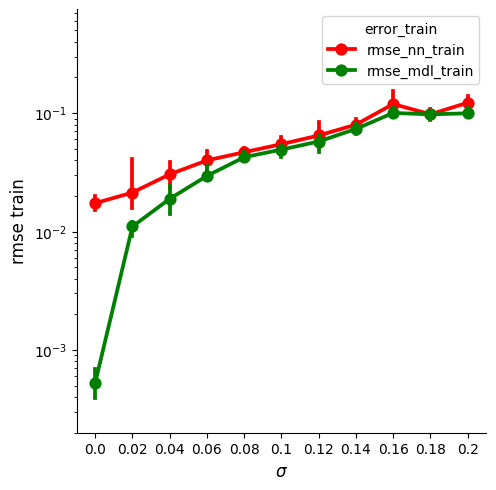

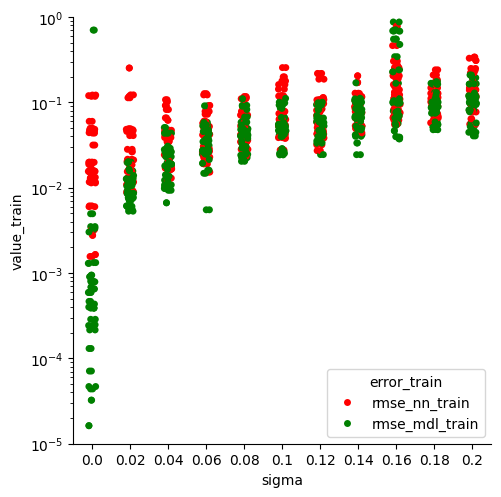

<Figure size 640x480 with 0 Axes>

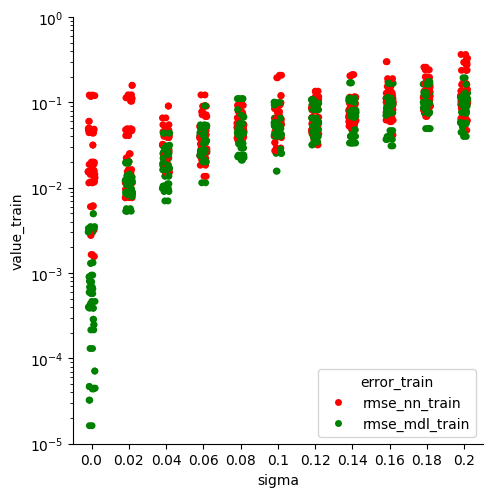

In [16]:
#tanh - rmse train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_tanh, x='sigma', y='value_train', hue="error_train", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)
plt.ylim(ymin,ymax)


name_fig='tanh_rmse_train.svg'
plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=errors_tanh, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'], legend_out=False)
plt.yscale("log")
plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
plt.show()

name_fig='tanh_rmse_train.svg'
plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=errors_tanh_old, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

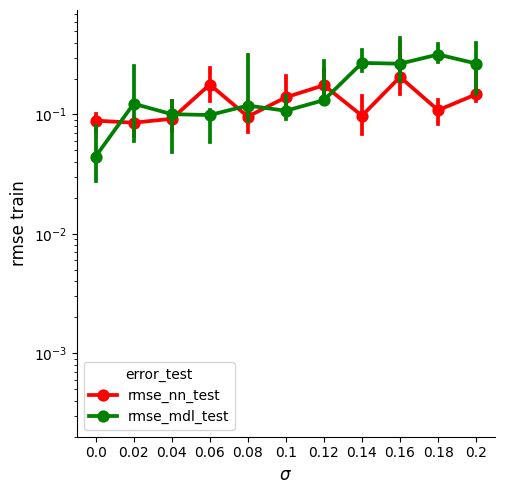

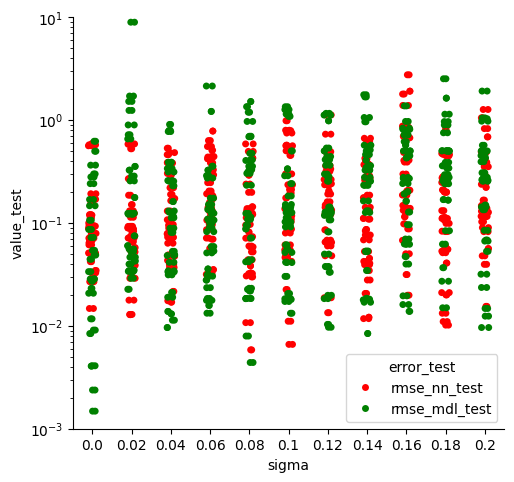

In [42]:
#tanh - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_tanh, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

plt.ylim(ymin,ymax)
name_fig='tanh_rmse_test.svg'
plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=errors_tanh, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(1e-3,10)
plt.savefig(output_path+'dist_test_tanh',dpi=300)
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

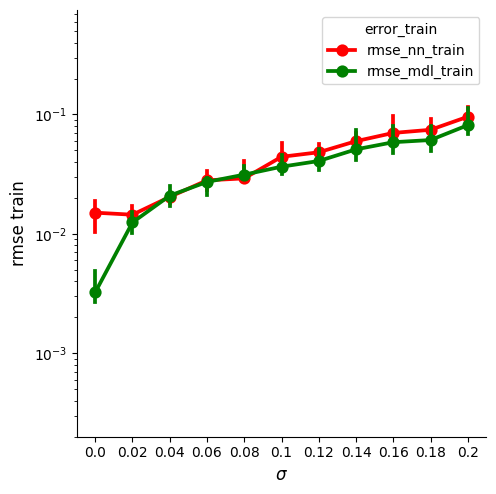

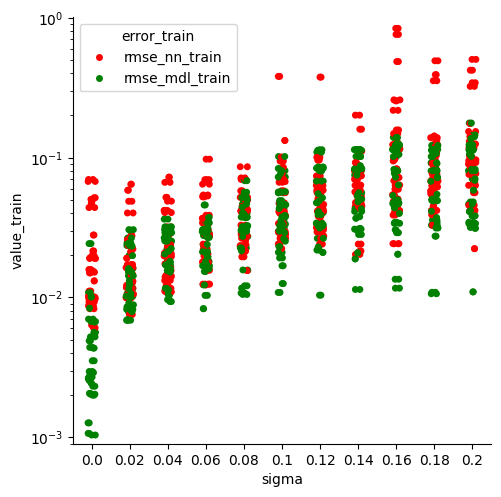

In [43]:
#leaky - rmse train
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_train', hue="error_train", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

plt.ylim(ymin,ymax)
name_fig='leaky_rmse_train.svg'
plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(0.9e-3,1.01)
plt.savefig(output_path+'dist_train_leaky',dpi=300)
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

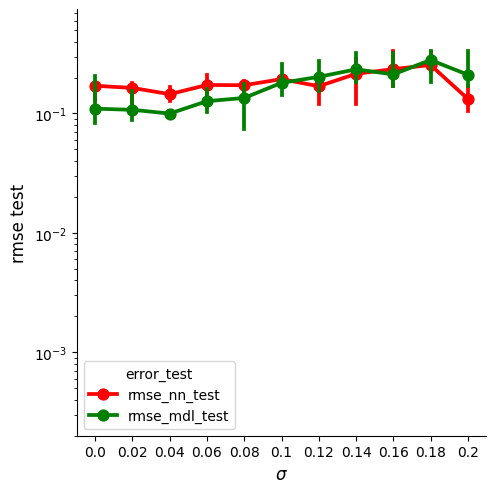

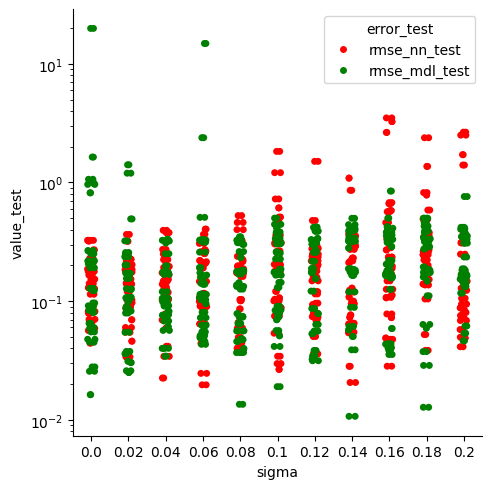

In [44]:
#leaky - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

plt.ylim(ymin,ymax)
name_fig='leaky_rmse_test.svg'
plt.savefig(output_path+name_fig,dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

plt.savefig(output_path+'dist_test_leaky',dpi=300)
plt.show()